In [19]:
%pip install pandas torch tqdm matplotlib

Note: you may need to restart the kernel to use updated packages.


In [20]:
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from matplotlib import pyplot as plt

In [21]:
df = pd.read_csv("../classification_breast_cancer_data.csv")

X = df.drop(columns=["Survival More Than 6 Years"]).values
y = df["Survival More Than 6 Years"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [22]:
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, output_dim),
        )

    def forward(self, x):
        return self.layer(x)

In [23]:
def train(model, train_loader, criterion, optimizer, epochs=50):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        model.train()
        train_acc = 0
        train_loss = 0

        for X_batch, y_batch in tqdm(
            train_loader, desc=f"Epoch {epoch + 1}/{epochs} - Training"
        ):
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            train_acc += (predicted == y_batch).sum().item()

        avg_train_loss = train_loss / len(train_dataset)
        avg_train_acc = train_acc / len(train_dataset)

        train_losses.append(avg_train_loss)
        train_accuracies.append(avg_train_acc)

        model.eval()
        val_acc = 0
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in tqdm(
                test_loader, desc=f"Epoch {epoch + 1}/{epochs} - Validation"
            ):
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                val_acc += (predicted == y_batch).sum().item()

        avg_val_loss = val_loss / len(test_dataset)
        avg_val_acc = val_acc / len(test_dataset)
        val_losses.append(avg_val_loss)
        val_accuracies.append(avg_val_acc)

        print(
            f"Epoch {epoch + 1}/{epochs} - "
            f"Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc:.4f}, "
            f"Val Loss: {avg_val_loss:.4f}, Val Acc: {avg_val_acc:.4f}"
        )

    return train_losses, train_accuracies, val_losses, val_accuracies

In [26]:
model = MLP(input_dim=X_train_tensor.shape[1], output_dim=2)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 200

train_losses, train_accuracies, val_losses, val_accuracies = train(
    model, train_loader, criterion, optimizer, epochs=epochs
)

Epoch 1/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4481.09it/s]


Epoch 1/200 - Train Loss: 0.0218, Train Acc: 0.5070, Val Loss: 0.0222, Val Acc: 0.5217


Epoch 2/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4493.47it/s]


Epoch 2/200 - Train Loss: 0.0217, Train Acc: 0.5247, Val Loss: 0.0222, Val Acc: 0.5590


Epoch 3/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4771.68it/s]


Epoch 3/200 - Train Loss: 0.0216, Train Acc: 0.5266, Val Loss: 0.0222, Val Acc: 0.5453


Epoch 4/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4361.38it/s]


Epoch 4/200 - Train Loss: 0.0216, Train Acc: 0.5393, Val Loss: 0.0222, Val Acc: 0.5553


Epoch 5/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4470.44it/s]


Epoch 5/200 - Train Loss: 0.0216, Train Acc: 0.5393, Val Loss: 0.0222, Val Acc: 0.5429


Epoch 6/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4298.97it/s]


Epoch 6/200 - Train Loss: 0.0216, Train Acc: 0.5346, Val Loss: 0.0223, Val Acc: 0.5391


Epoch 7/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4207.25it/s]


Epoch 7/200 - Train Loss: 0.0215, Train Acc: 0.5412, Val Loss: 0.0222, Val Acc: 0.5441


Epoch 8/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4416.49it/s]


Epoch 8/200 - Train Loss: 0.0215, Train Acc: 0.5390, Val Loss: 0.0223, Val Acc: 0.5478


Epoch 9/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4674.72it/s]


Epoch 9/200 - Train Loss: 0.0215, Train Acc: 0.5424, Val Loss: 0.0223, Val Acc: 0.5491


Epoch 10/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4559.03it/s]


Epoch 10/200 - Train Loss: 0.0215, Train Acc: 0.5374, Val Loss: 0.0223, Val Acc: 0.5391


Epoch 11/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4577.40it/s]


Epoch 11/200 - Train Loss: 0.0216, Train Acc: 0.5477, Val Loss: 0.0223, Val Acc: 0.5416


Epoch 12/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4672.92it/s]


Epoch 12/200 - Train Loss: 0.0214, Train Acc: 0.5502, Val Loss: 0.0223, Val Acc: 0.5379


Epoch 13/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4665.12it/s]


Epoch 13/200 - Train Loss: 0.0215, Train Acc: 0.5424, Val Loss: 0.0223, Val Acc: 0.5404


Epoch 14/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4528.73it/s]


Epoch 14/200 - Train Loss: 0.0214, Train Acc: 0.5511, Val Loss: 0.0223, Val Acc: 0.5441


Epoch 15/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4476.50it/s]


Epoch 15/200 - Train Loss: 0.0214, Train Acc: 0.5536, Val Loss: 0.0224, Val Acc: 0.5478


Epoch 16/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4637.94it/s]


Epoch 16/200 - Train Loss: 0.0213, Train Acc: 0.5530, Val Loss: 0.0225, Val Acc: 0.5391


Epoch 17/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4486.62it/s]


Epoch 17/200 - Train Loss: 0.0214, Train Acc: 0.5511, Val Loss: 0.0224, Val Acc: 0.5466


Epoch 18/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4642.09it/s]


Epoch 18/200 - Train Loss: 0.0213, Train Acc: 0.5499, Val Loss: 0.0224, Val Acc: 0.5491


Epoch 19/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4672.92it/s]


Epoch 19/200 - Train Loss: 0.0213, Train Acc: 0.5561, Val Loss: 0.0225, Val Acc: 0.5391


Epoch 20/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4747.99it/s]


Epoch 20/200 - Train Loss: 0.0214, Train Acc: 0.5480, Val Loss: 0.0224, Val Acc: 0.5466


Epoch 21/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4605.82it/s]


Epoch 21/200 - Train Loss: 0.0213, Train Acc: 0.5558, Val Loss: 0.0224, Val Acc: 0.5429


Epoch 22/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4610.88it/s]


Epoch 22/200 - Train Loss: 0.0213, Train Acc: 0.5536, Val Loss: 0.0224, Val Acc: 0.5317


Epoch 23/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4546.86it/s]


Epoch 23/200 - Train Loss: 0.0213, Train Acc: 0.5567, Val Loss: 0.0223, Val Acc: 0.5391


Epoch 24/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4585.48it/s]


Epoch 24/200 - Train Loss: 0.0213, Train Acc: 0.5511, Val Loss: 0.0223, Val Acc: 0.5441


Epoch 25/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4628.10it/s]


Epoch 25/200 - Train Loss: 0.0213, Train Acc: 0.5595, Val Loss: 0.0224, Val Acc: 0.5280


Epoch 26/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4514.67it/s]


Epoch 26/200 - Train Loss: 0.0212, Train Acc: 0.5617, Val Loss: 0.0224, Val Acc: 0.5329


Epoch 27/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4730.69it/s]


Epoch 27/200 - Train Loss: 0.0213, Train Acc: 0.5555, Val Loss: 0.0225, Val Acc: 0.5242


Epoch 28/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4551.79it/s]


Epoch 28/200 - Train Loss: 0.0213, Train Acc: 0.5592, Val Loss: 0.0224, Val Acc: 0.5193


Epoch 29/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4400.09it/s]


Epoch 29/200 - Train Loss: 0.0212, Train Acc: 0.5635, Val Loss: 0.0224, Val Acc: 0.5280


Epoch 30/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4110.67it/s]


Epoch 30/200 - Train Loss: 0.0212, Train Acc: 0.5728, Val Loss: 0.0225, Val Acc: 0.5230


Epoch 31/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4027.92it/s]


Epoch 31/200 - Train Loss: 0.0212, Train Acc: 0.5623, Val Loss: 0.0225, Val Acc: 0.5180


Epoch 32/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4622.41it/s]


Epoch 32/200 - Train Loss: 0.0213, Train Acc: 0.5530, Val Loss: 0.0225, Val Acc: 0.5242


Epoch 33/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4590.50it/s]


Epoch 33/200 - Train Loss: 0.0212, Train Acc: 0.5691, Val Loss: 0.0225, Val Acc: 0.5205


Epoch 34/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4649.41it/s]


Epoch 34/200 - Train Loss: 0.0211, Train Acc: 0.5688, Val Loss: 0.0225, Val Acc: 0.5267


Epoch 35/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4668.72it/s]


Epoch 35/200 - Train Loss: 0.0212, Train Acc: 0.5673, Val Loss: 0.0224, Val Acc: 0.5416


Epoch 36/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4608.35it/s]


Epoch 36/200 - Train Loss: 0.0212, Train Acc: 0.5688, Val Loss: 0.0225, Val Acc: 0.5342


Epoch 37/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4642.88it/s]


Epoch 37/200 - Train Loss: 0.0212, Train Acc: 0.5657, Val Loss: 0.0225, Val Acc: 0.5304


Epoch 38/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4647.63it/s]


Epoch 38/200 - Train Loss: 0.0211, Train Acc: 0.5592, Val Loss: 0.0225, Val Acc: 0.5317


Epoch 39/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4688.99it/s]


Epoch 39/200 - Train Loss: 0.0211, Train Acc: 0.5645, Val Loss: 0.0226, Val Acc: 0.5255


Epoch 40/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4593.40it/s]


Epoch 40/200 - Train Loss: 0.0211, Train Acc: 0.5760, Val Loss: 0.0225, Val Acc: 0.5366


Epoch 41/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4755.03it/s]


Epoch 41/200 - Train Loss: 0.0211, Train Acc: 0.5750, Val Loss: 0.0225, Val Acc: 0.5441


Epoch 42/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4597.66it/s]


Epoch 42/200 - Train Loss: 0.0211, Train Acc: 0.5725, Val Loss: 0.0226, Val Acc: 0.5429


Epoch 43/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4597.66it/s]


Epoch 43/200 - Train Loss: 0.0210, Train Acc: 0.5791, Val Loss: 0.0226, Val Acc: 0.5329


Epoch 44/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4631.44it/s]


Epoch 44/200 - Train Loss: 0.0210, Train Acc: 0.5576, Val Loss: 0.0225, Val Acc: 0.5453


Epoch 45/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4638.14it/s]


Epoch 45/200 - Train Loss: 0.0211, Train Acc: 0.5691, Val Loss: 0.0226, Val Acc: 0.5329


Epoch 46/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4468.06it/s]


Epoch 46/200 - Train Loss: 0.0210, Train Acc: 0.5784, Val Loss: 0.0225, Val Acc: 0.5255


Epoch 47/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4365.57it/s]


Epoch 47/200 - Train Loss: 0.0209, Train Acc: 0.5815, Val Loss: 0.0227, Val Acc: 0.5217


Epoch 48/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4511.50it/s]


Epoch 48/200 - Train Loss: 0.0210, Train Acc: 0.5666, Val Loss: 0.0226, Val Acc: 0.5280


Epoch 49/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4683.76it/s]


Epoch 49/200 - Train Loss: 0.0210, Train Acc: 0.5760, Val Loss: 0.0227, Val Acc: 0.5255


Epoch 50/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4448.19it/s]


Epoch 50/200 - Train Loss: 0.0210, Train Acc: 0.5874, Val Loss: 0.0227, Val Acc: 0.5354


Epoch 51/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4544.59it/s]


Epoch 51/200 - Train Loss: 0.0209, Train Acc: 0.5887, Val Loss: 0.0228, Val Acc: 0.5267


Epoch 52/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4541.37it/s]


Epoch 52/200 - Train Loss: 0.0209, Train Acc: 0.5791, Val Loss: 0.0227, Val Acc: 0.5230


Epoch 53/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4729.87it/s]


Epoch 53/200 - Train Loss: 0.0209, Train Acc: 0.5800, Val Loss: 0.0227, Val Acc: 0.5230


Epoch 54/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4586.64it/s]


Epoch 54/200 - Train Loss: 0.0208, Train Acc: 0.5862, Val Loss: 0.0228, Val Acc: 0.5292


Epoch 55/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4545.34it/s]


Epoch 55/200 - Train Loss: 0.0210, Train Acc: 0.5694, Val Loss: 0.0227, Val Acc: 0.5180


Epoch 56/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4610.88it/s]


Epoch 56/200 - Train Loss: 0.0209, Train Acc: 0.5924, Val Loss: 0.0228, Val Acc: 0.5193


Epoch 57/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4483.67it/s]


Epoch 57/200 - Train Loss: 0.0210, Train Acc: 0.5716, Val Loss: 0.0228, Val Acc: 0.5267


Epoch 58/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4687.18it/s]


Epoch 58/200 - Train Loss: 0.0208, Train Acc: 0.5847, Val Loss: 0.0228, Val Acc: 0.5280


Epoch 59/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4598.44it/s]


Epoch 59/200 - Train Loss: 0.0207, Train Acc: 0.5850, Val Loss: 0.0229, Val Acc: 0.5354


Epoch 60/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4723.11it/s]


Epoch 60/200 - Train Loss: 0.0208, Train Acc: 0.5896, Val Loss: 0.0229, Val Acc: 0.5317


Epoch 61/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4598.63it/s]


Epoch 61/200 - Train Loss: 0.0208, Train Acc: 0.5704, Val Loss: 0.0228, Val Acc: 0.5292


Epoch 62/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4517.10it/s]


Epoch 62/200 - Train Loss: 0.0208, Train Acc: 0.5788, Val Loss: 0.0229, Val Acc: 0.5242


Epoch 63/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4587.02it/s]


Epoch 63/200 - Train Loss: 0.0208, Train Acc: 0.5847, Val Loss: 0.0228, Val Acc: 0.5193


Epoch 64/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5188.50it/s]


Epoch 64/200 - Train Loss: 0.0209, Train Acc: 0.5725, Val Loss: 0.0229, Val Acc: 0.5068


Epoch 65/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4583.94it/s]


Epoch 65/200 - Train Loss: 0.0208, Train Acc: 0.5834, Val Loss: 0.0228, Val Acc: 0.5317


Epoch 66/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4620.45it/s]


Epoch 66/200 - Train Loss: 0.0207, Train Acc: 0.5921, Val Loss: 0.0229, Val Acc: 0.5292


Epoch 67/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4470.26it/s]


Epoch 67/200 - Train Loss: 0.0208, Train Acc: 0.5890, Val Loss: 0.0228, Val Acc: 0.5068


Epoch 68/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4340.72it/s]


Epoch 68/200 - Train Loss: 0.0208, Train Acc: 0.5896, Val Loss: 0.0228, Val Acc: 0.5168


Epoch 69/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4524.22it/s]


Epoch 69/200 - Train Loss: 0.0206, Train Acc: 0.5940, Val Loss: 0.0229, Val Acc: 0.5068


Epoch 70/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4623.78it/s]


Epoch 70/200 - Train Loss: 0.0207, Train Acc: 0.5862, Val Loss: 0.0229, Val Acc: 0.5255


Epoch 71/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4638.93it/s]


Epoch 71/200 - Train Loss: 0.0207, Train Acc: 0.5775, Val Loss: 0.0229, Val Acc: 0.5230


Epoch 72/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4553.32it/s]


Epoch 72/200 - Train Loss: 0.0208, Train Acc: 0.5912, Val Loss: 0.0227, Val Acc: 0.5193


Epoch 73/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4639.32it/s]


Epoch 73/200 - Train Loss: 0.0207, Train Acc: 0.5887, Val Loss: 0.0228, Val Acc: 0.5242


Epoch 74/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4462.03it/s]


Epoch 74/200 - Train Loss: 0.0206, Train Acc: 0.5915, Val Loss: 0.0229, Val Acc: 0.5217


Epoch 75/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4605.82it/s]


Epoch 75/200 - Train Loss: 0.0206, Train Acc: 0.5890, Val Loss: 0.0231, Val Acc: 0.5168


Epoch 76/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4604.07it/s]


Epoch 76/200 - Train Loss: 0.0206, Train Acc: 0.5887, Val Loss: 0.0230, Val Acc: 0.5304


Epoch 77/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4339.17it/s]


Epoch 77/200 - Train Loss: 0.0206, Train Acc: 0.5859, Val Loss: 0.0231, Val Acc: 0.5255


Epoch 78/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4573.94it/s]


Epoch 78/200 - Train Loss: 0.0205, Train Acc: 0.5934, Val Loss: 0.0232, Val Acc: 0.5304


Epoch 79/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4837.29it/s]


Epoch 79/200 - Train Loss: 0.0206, Train Acc: 0.5980, Val Loss: 0.0232, Val Acc: 0.5043


Epoch 80/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4581.63it/s]


Epoch 80/200 - Train Loss: 0.0206, Train Acc: 0.5896, Val Loss: 0.0232, Val Acc: 0.5143


Epoch 81/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4548.57it/s]


Epoch 81/200 - Train Loss: 0.0206, Train Acc: 0.5874, Val Loss: 0.0231, Val Acc: 0.5342


Epoch 82/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4609.13it/s]


Epoch 82/200 - Train Loss: 0.0207, Train Acc: 0.5859, Val Loss: 0.0230, Val Acc: 0.5118


Epoch 83/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4550.85it/s]


Epoch 83/200 - Train Loss: 0.0204, Train Acc: 0.6107, Val Loss: 0.0231, Val Acc: 0.5230


Epoch 84/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4662.93it/s]


Epoch 84/200 - Train Loss: 0.0207, Train Acc: 0.5909, Val Loss: 0.0231, Val Acc: 0.5093


Epoch 85/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4827.23it/s]


Epoch 85/200 - Train Loss: 0.0207, Train Acc: 0.6002, Val Loss: 0.0230, Val Acc: 0.5118


Epoch 86/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4442.21it/s]


Epoch 86/200 - Train Loss: 0.0206, Train Acc: 0.5884, Val Loss: 0.0231, Val Acc: 0.4981


Epoch 87/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 3984.50it/s]


Epoch 87/200 - Train Loss: 0.0205, Train Acc: 0.6005, Val Loss: 0.0233, Val Acc: 0.5106


Epoch 88/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4572.60it/s]


Epoch 88/200 - Train Loss: 0.0204, Train Acc: 0.6017, Val Loss: 0.0233, Val Acc: 0.4969


Epoch 89/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4589.53it/s]


Epoch 89/200 - Train Loss: 0.0207, Train Acc: 0.5924, Val Loss: 0.0231, Val Acc: 0.5168


Epoch 90/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4488.29it/s]


Epoch 90/200 - Train Loss: 0.0204, Train Acc: 0.5989, Val Loss: 0.0232, Val Acc: 0.5242


Epoch 91/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4636.95it/s]


Epoch 91/200 - Train Loss: 0.0206, Train Acc: 0.5887, Val Loss: 0.0232, Val Acc: 0.5118


Epoch 92/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4679.74it/s]


Epoch 92/200 - Train Loss: 0.0205, Train Acc: 0.5949, Val Loss: 0.0234, Val Acc: 0.5205


Epoch 93/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4772.51it/s]


Epoch 93/200 - Train Loss: 0.0205, Train Acc: 0.6042, Val Loss: 0.0233, Val Acc: 0.5093


Epoch 94/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4568.58it/s]


Epoch 94/200 - Train Loss: 0.0205, Train Acc: 0.5949, Val Loss: 0.0234, Val Acc: 0.5019


Epoch 95/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4648.62it/s]


Epoch 95/200 - Train Loss: 0.0204, Train Acc: 0.5971, Val Loss: 0.0233, Val Acc: 0.4994


Epoch 96/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4571.64it/s]


Epoch 96/200 - Train Loss: 0.0203, Train Acc: 0.6014, Val Loss: 0.0234, Val Acc: 0.5031


Epoch 97/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4614.20it/s]


Epoch 97/200 - Train Loss: 0.0204, Train Acc: 0.6092, Val Loss: 0.0234, Val Acc: 0.5068


Epoch 98/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4621.43it/s]


Epoch 98/200 - Train Loss: 0.0205, Train Acc: 0.5974, Val Loss: 0.0233, Val Acc: 0.4820


Epoch 99/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4197.05it/s]


Epoch 99/200 - Train Loss: 0.0204, Train Acc: 0.5940, Val Loss: 0.0234, Val Acc: 0.4932


Epoch 100/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4515.23it/s]


Epoch 100/200 - Train Loss: 0.0205, Train Acc: 0.5949, Val Loss: 0.0232, Val Acc: 0.5093


Epoch 101/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4641.10it/s]


Epoch 101/200 - Train Loss: 0.0203, Train Acc: 0.6073, Val Loss: 0.0234, Val Acc: 0.4932


Epoch 102/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4627.12it/s]


Epoch 102/200 - Train Loss: 0.0203, Train Acc: 0.6021, Val Loss: 0.0233, Val Acc: 0.5168


Epoch 103/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4611.66it/s]


Epoch 103/200 - Train Loss: 0.0204, Train Acc: 0.6117, Val Loss: 0.0235, Val Acc: 0.5143


Epoch 104/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4613.81it/s]


Epoch 104/200 - Train Loss: 0.0204, Train Acc: 0.6005, Val Loss: 0.0234, Val Acc: 0.5180


Epoch 105/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4554.46it/s]


Epoch 105/200 - Train Loss: 0.0204, Train Acc: 0.6095, Val Loss: 0.0233, Val Acc: 0.5155


Epoch 106/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4724.75it/s]


Epoch 106/200 - Train Loss: 0.0201, Train Acc: 0.6073, Val Loss: 0.0235, Val Acc: 0.5354


Epoch 107/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4706.80it/s]


Epoch 107/200 - Train Loss: 0.0204, Train Acc: 0.6048, Val Loss: 0.0233, Val Acc: 0.4994


Epoch 108/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4540.61it/s]


Epoch 108/200 - Train Loss: 0.0202, Train Acc: 0.6107, Val Loss: 0.0236, Val Acc: 0.5130


Epoch 109/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4589.53it/s]


Epoch 109/200 - Train Loss: 0.0203, Train Acc: 0.6070, Val Loss: 0.0234, Val Acc: 0.5056


Epoch 110/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4345.74it/s]


Epoch 110/200 - Train Loss: 0.0202, Train Acc: 0.6095, Val Loss: 0.0234, Val Acc: 0.5193


Epoch 111/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4510.56it/s]


Epoch 111/200 - Train Loss: 0.0202, Train Acc: 0.5993, Val Loss: 0.0235, Val Acc: 0.5106


Epoch 112/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4411.13it/s]


Epoch 112/200 - Train Loss: 0.0203, Train Acc: 0.5999, Val Loss: 0.0235, Val Acc: 0.5043


Epoch 113/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4435.35it/s]


Epoch 113/200 - Train Loss: 0.0204, Train Acc: 0.6033, Val Loss: 0.0235, Val Acc: 0.5118


Epoch 114/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4547.81it/s]


Epoch 114/200 - Train Loss: 0.0201, Train Acc: 0.6173, Val Loss: 0.0238, Val Acc: 0.5019


Epoch 115/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4451.46it/s]


Epoch 115/200 - Train Loss: 0.0202, Train Acc: 0.6036, Val Loss: 0.0237, Val Acc: 0.5031


Epoch 116/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4622.02it/s]


Epoch 116/200 - Train Loss: 0.0203, Train Acc: 0.5986, Val Loss: 0.0235, Val Acc: 0.5068


Epoch 117/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4593.40it/s]


Epoch 117/200 - Train Loss: 0.0202, Train Acc: 0.6095, Val Loss: 0.0235, Val Acc: 0.5130


Epoch 118/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4468.79it/s]


Epoch 118/200 - Train Loss: 0.0203, Train Acc: 0.5983, Val Loss: 0.0235, Val Acc: 0.5143


Epoch 119/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4583.94it/s]


Epoch 119/200 - Train Loss: 0.0199, Train Acc: 0.6207, Val Loss: 0.0235, Val Acc: 0.5180


Epoch 120/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4719.64it/s]


Epoch 120/200 - Train Loss: 0.0201, Train Acc: 0.6021, Val Loss: 0.0236, Val Acc: 0.5168


Epoch 121/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4641.10it/s]


Epoch 121/200 - Train Loss: 0.0203, Train Acc: 0.6101, Val Loss: 0.0235, Val Acc: 0.5130


Epoch 122/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4480.54it/s]


Epoch 122/200 - Train Loss: 0.0200, Train Acc: 0.6120, Val Loss: 0.0239, Val Acc: 0.4919


Epoch 123/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4472.64it/s]


Epoch 123/200 - Train Loss: 0.0202, Train Acc: 0.6024, Val Loss: 0.0235, Val Acc: 0.5106


Epoch 124/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4595.14it/s]


Epoch 124/200 - Train Loss: 0.0200, Train Acc: 0.6142, Val Loss: 0.0234, Val Acc: 0.5242


Epoch 125/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4662.13it/s]


Epoch 125/200 - Train Loss: 0.0202, Train Acc: 0.6132, Val Loss: 0.0235, Val Acc: 0.5143


Epoch 126/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4642.09it/s]


Epoch 126/200 - Train Loss: 0.0201, Train Acc: 0.6008, Val Loss: 0.0236, Val Acc: 0.5205


Epoch 127/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4617.13it/s]


Epoch 127/200 - Train Loss: 0.0201, Train Acc: 0.6135, Val Loss: 0.0235, Val Acc: 0.5230


Epoch 128/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4672.12it/s]


Epoch 128/200 - Train Loss: 0.0203, Train Acc: 0.5943, Val Loss: 0.0233, Val Acc: 0.5242


Epoch 129/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4611.66it/s]


Epoch 129/200 - Train Loss: 0.0201, Train Acc: 0.6011, Val Loss: 0.0236, Val Acc: 0.5168


Epoch 130/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4526.29it/s]


Epoch 130/200 - Train Loss: 0.0202, Train Acc: 0.6089, Val Loss: 0.0235, Val Acc: 0.5056


Epoch 131/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4539.10it/s]


Epoch 131/200 - Train Loss: 0.0200, Train Acc: 0.6129, Val Loss: 0.0236, Val Acc: 0.5118


Epoch 132/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4433.73it/s]


Epoch 132/200 - Train Loss: 0.0201, Train Acc: 0.6036, Val Loss: 0.0236, Val Acc: 0.5280


Epoch 133/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4622.21it/s]


Epoch 133/200 - Train Loss: 0.0201, Train Acc: 0.6027, Val Loss: 0.0235, Val Acc: 0.5354


Epoch 134/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4566.28it/s]


Epoch 134/200 - Train Loss: 0.0201, Train Acc: 0.5989, Val Loss: 0.0236, Val Acc: 0.5168


Epoch 135/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4675.32it/s]


Epoch 135/200 - Train Loss: 0.0199, Train Acc: 0.6222, Val Loss: 0.0237, Val Acc: 0.5292


Epoch 136/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4797.92it/s]


Epoch 136/200 - Train Loss: 0.0200, Train Acc: 0.6157, Val Loss: 0.0237, Val Acc: 0.5155


Epoch 137/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4570.11it/s]


Epoch 137/200 - Train Loss: 0.0200, Train Acc: 0.6089, Val Loss: 0.0237, Val Acc: 0.5205


Epoch 138/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4477.97it/s]


Epoch 138/200 - Train Loss: 0.0199, Train Acc: 0.6194, Val Loss: 0.0239, Val Acc: 0.5118


Epoch 139/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4503.67it/s]


Epoch 139/200 - Train Loss: 0.0199, Train Acc: 0.6213, Val Loss: 0.0237, Val Acc: 0.5019


Epoch 140/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4554.27it/s]


Epoch 140/200 - Train Loss: 0.0201, Train Acc: 0.6033, Val Loss: 0.0235, Val Acc: 0.5180


Epoch 141/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4594.37it/s]


Epoch 141/200 - Train Loss: 0.0198, Train Acc: 0.6080, Val Loss: 0.0237, Val Acc: 0.5106


Epoch 142/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4479.62it/s]


Epoch 142/200 - Train Loss: 0.0199, Train Acc: 0.6151, Val Loss: 0.0238, Val Acc: 0.5292


Epoch 143/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4611.66it/s]


Epoch 143/200 - Train Loss: 0.0200, Train Acc: 0.6182, Val Loss: 0.0238, Val Acc: 0.5292


Epoch 144/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4641.30it/s]


Epoch 144/200 - Train Loss: 0.0198, Train Acc: 0.6111, Val Loss: 0.0238, Val Acc: 0.5304


Epoch 145/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4582.40it/s]


Epoch 145/200 - Train Loss: 0.0199, Train Acc: 0.6135, Val Loss: 0.0239, Val Acc: 0.5143


Epoch 146/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4616.54it/s]


Epoch 146/200 - Train Loss: 0.0200, Train Acc: 0.6107, Val Loss: 0.0239, Val Acc: 0.5342


Epoch 147/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4626.33it/s]


Epoch 147/200 - Train Loss: 0.0198, Train Acc: 0.6263, Val Loss: 0.0240, Val Acc: 0.5255


Epoch 148/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4477.41it/s]


Epoch 148/200 - Train Loss: 0.0199, Train Acc: 0.6120, Val Loss: 0.0238, Val Acc: 0.5180


Epoch 149/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4662.93it/s]


Epoch 149/200 - Train Loss: 0.0200, Train Acc: 0.5986, Val Loss: 0.0237, Val Acc: 0.5193


Epoch 150/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4623.78it/s]


Epoch 150/200 - Train Loss: 0.0198, Train Acc: 0.6160, Val Loss: 0.0238, Val Acc: 0.5205


Epoch 151/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4622.41it/s]


Epoch 151/200 - Train Loss: 0.0200, Train Acc: 0.6076, Val Loss: 0.0238, Val Acc: 0.5217


Epoch 152/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4562.08it/s]


Epoch 152/200 - Train Loss: 0.0198, Train Acc: 0.6114, Val Loss: 0.0238, Val Acc: 0.5093


Epoch 153/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4708.22it/s]


Epoch 153/200 - Train Loss: 0.0199, Train Acc: 0.6182, Val Loss: 0.0236, Val Acc: 0.5081


Epoch 154/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4329.00it/s]


Epoch 154/200 - Train Loss: 0.0199, Train Acc: 0.6123, Val Loss: 0.0239, Val Acc: 0.5056


Epoch 155/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4362.60it/s]


Epoch 155/200 - Train Loss: 0.0200, Train Acc: 0.6142, Val Loss: 0.0239, Val Acc: 0.5130


Epoch 156/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4617.32it/s]


Epoch 156/200 - Train Loss: 0.0197, Train Acc: 0.6253, Val Loss: 0.0240, Val Acc: 0.5130


Epoch 157/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4673.52it/s]


Epoch 157/200 - Train Loss: 0.0199, Train Acc: 0.6120, Val Loss: 0.0239, Val Acc: 0.5143


Epoch 158/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4442.21it/s]


Epoch 158/200 - Train Loss: 0.0197, Train Acc: 0.6241, Val Loss: 0.0241, Val Acc: 0.5130


Epoch 159/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4512.99it/s]


Epoch 159/200 - Train Loss: 0.0197, Train Acc: 0.6210, Val Loss: 0.0241, Val Acc: 0.5205


Epoch 160/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4171.20it/s]


Epoch 160/200 - Train Loss: 0.0198, Train Acc: 0.6185, Val Loss: 0.0241, Val Acc: 0.5280


Epoch 161/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4623.78it/s]


Epoch 161/200 - Train Loss: 0.0199, Train Acc: 0.6139, Val Loss: 0.0240, Val Acc: 0.5180


Epoch 162/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4746.96it/s]


Epoch 162/200 - Train Loss: 0.0198, Train Acc: 0.6170, Val Loss: 0.0237, Val Acc: 0.5292


Epoch 163/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4581.44it/s]


Epoch 163/200 - Train Loss: 0.0196, Train Acc: 0.6194, Val Loss: 0.0240, Val Acc: 0.5255


Epoch 164/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4585.48it/s]


Epoch 164/200 - Train Loss: 0.0198, Train Acc: 0.6194, Val Loss: 0.0240, Val Acc: 0.5230


Epoch 165/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4539.86it/s]


Epoch 165/200 - Train Loss: 0.0197, Train Acc: 0.6176, Val Loss: 0.0241, Val Acc: 0.5143


Epoch 166/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4724.75it/s]


Epoch 166/200 - Train Loss: 0.0197, Train Acc: 0.6179, Val Loss: 0.0240, Val Acc: 0.5068


Epoch 167/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 2318.92it/s]


Epoch 167/200 - Train Loss: 0.0195, Train Acc: 0.6263, Val Loss: 0.0241, Val Acc: 0.5130


Epoch 168/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4512.24it/s]


Epoch 168/200 - Train Loss: 0.0197, Train Acc: 0.6278, Val Loss: 0.0242, Val Acc: 0.5168


Epoch 169/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4586.25it/s]


Epoch 169/200 - Train Loss: 0.0198, Train Acc: 0.6201, Val Loss: 0.0242, Val Acc: 0.5118


Epoch 170/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4740.15it/s]


Epoch 170/200 - Train Loss: 0.0197, Train Acc: 0.6232, Val Loss: 0.0243, Val Acc: 0.5230


Epoch 171/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4563.80it/s]


Epoch 171/200 - Train Loss: 0.0198, Train Acc: 0.6092, Val Loss: 0.0242, Val Acc: 0.5081


Epoch 172/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4736.86it/s]


Epoch 172/200 - Train Loss: 0.0196, Train Acc: 0.6278, Val Loss: 0.0244, Val Acc: 0.5106


Epoch 173/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4037.31it/s]


Epoch 173/200 - Train Loss: 0.0196, Train Acc: 0.6222, Val Loss: 0.0244, Val Acc: 0.5106


Epoch 174/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4467.33it/s]


Epoch 174/200 - Train Loss: 0.0197, Train Acc: 0.6176, Val Loss: 0.0243, Val Acc: 0.5180


Epoch 175/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4699.30it/s]


Epoch 175/200 - Train Loss: 0.0198, Train Acc: 0.6191, Val Loss: 0.0241, Val Acc: 0.5242


Epoch 176/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4722.91it/s]


Epoch 176/200 - Train Loss: 0.0196, Train Acc: 0.6176, Val Loss: 0.0242, Val Acc: 0.5292


Epoch 177/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4734.18it/s]


Epoch 177/200 - Train Loss: 0.0196, Train Acc: 0.6362, Val Loss: 0.0241, Val Acc: 0.5267


Epoch 178/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4432.28it/s]


Epoch 178/200 - Train Loss: 0.0196, Train Acc: 0.6204, Val Loss: 0.0241, Val Acc: 0.5317


Epoch 179/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4554.08it/s]


Epoch 179/200 - Train Loss: 0.0197, Train Acc: 0.6191, Val Loss: 0.0240, Val Acc: 0.5106


Epoch 180/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4497.54it/s]


Epoch 180/200 - Train Loss: 0.0199, Train Acc: 0.6073, Val Loss: 0.0239, Val Acc: 0.5106


Epoch 181/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4426.35it/s]


Epoch 181/200 - Train Loss: 0.0195, Train Acc: 0.6356, Val Loss: 0.0241, Val Acc: 0.5255


Epoch 182/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4524.04it/s]


Epoch 182/200 - Train Loss: 0.0195, Train Acc: 0.6201, Val Loss: 0.0242, Val Acc: 0.5230


Epoch 183/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4657.95it/s]


Epoch 183/200 - Train Loss: 0.0196, Train Acc: 0.6253, Val Loss: 0.0241, Val Acc: 0.5143


Epoch 184/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4678.73it/s]


Epoch 184/200 - Train Loss: 0.0195, Train Acc: 0.6229, Val Loss: 0.0242, Val Acc: 0.5217


Epoch 185/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4583.94it/s]


Epoch 185/200 - Train Loss: 0.0197, Train Acc: 0.6272, Val Loss: 0.0241, Val Acc: 0.5180


Epoch 186/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4606.59it/s]


Epoch 186/200 - Train Loss: 0.0194, Train Acc: 0.6294, Val Loss: 0.0244, Val Acc: 0.5255


Epoch 187/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4620.45it/s]


Epoch 187/200 - Train Loss: 0.0198, Train Acc: 0.6285, Val Loss: 0.0241, Val Acc: 0.5242


Epoch 188/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4632.03it/s]


Epoch 188/200 - Train Loss: 0.0193, Train Acc: 0.6313, Val Loss: 0.0242, Val Acc: 0.5342


Epoch 189/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4562.46it/s]


Epoch 189/200 - Train Loss: 0.0194, Train Acc: 0.6443, Val Loss: 0.0244, Val Acc: 0.5255


Epoch 190/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4543.07it/s]


Epoch 190/200 - Train Loss: 0.0198, Train Acc: 0.6219, Val Loss: 0.0241, Val Acc: 0.5056


Epoch 191/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4533.63it/s]


Epoch 191/200 - Train Loss: 0.0196, Train Acc: 0.6232, Val Loss: 0.0243, Val Acc: 0.5267


Epoch 192/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4155.15it/s]


Epoch 192/200 - Train Loss: 0.0195, Train Acc: 0.6257, Val Loss: 0.0243, Val Acc: 0.5056


Epoch 193/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4526.48it/s]


Epoch 193/200 - Train Loss: 0.0195, Train Acc: 0.6309, Val Loss: 0.0243, Val Acc: 0.5267


Epoch 194/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4416.67it/s]


Epoch 194/200 - Train Loss: 0.0198, Train Acc: 0.6210, Val Loss: 0.0240, Val Acc: 0.5255


Epoch 195/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4596.69it/s]


Epoch 195/200 - Train Loss: 0.0195, Train Acc: 0.6263, Val Loss: 0.0243, Val Acc: 0.5255


Epoch 196/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4593.79it/s]


Epoch 196/200 - Train Loss: 0.0197, Train Acc: 0.6244, Val Loss: 0.0244, Val Acc: 0.5230


Epoch 197/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4709.44it/s]


Epoch 197/200 - Train Loss: 0.0193, Train Acc: 0.6406, Val Loss: 0.0245, Val Acc: 0.5168


Epoch 198/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4648.62it/s]


Epoch 198/200 - Train Loss: 0.0194, Train Acc: 0.6222, Val Loss: 0.0246, Val Acc: 0.5205


Epoch 199/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4575.86it/s]


Epoch 199/200 - Train Loss: 0.0196, Train Acc: 0.6288, Val Loss: 0.0244, Val Acc: 0.5193


Epoch 200/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4423.29it/s]

Epoch 200/200 - Train Loss: 0.0193, Train Acc: 0.6313, Val Loss: 0.0244, Val Acc: 0.5280


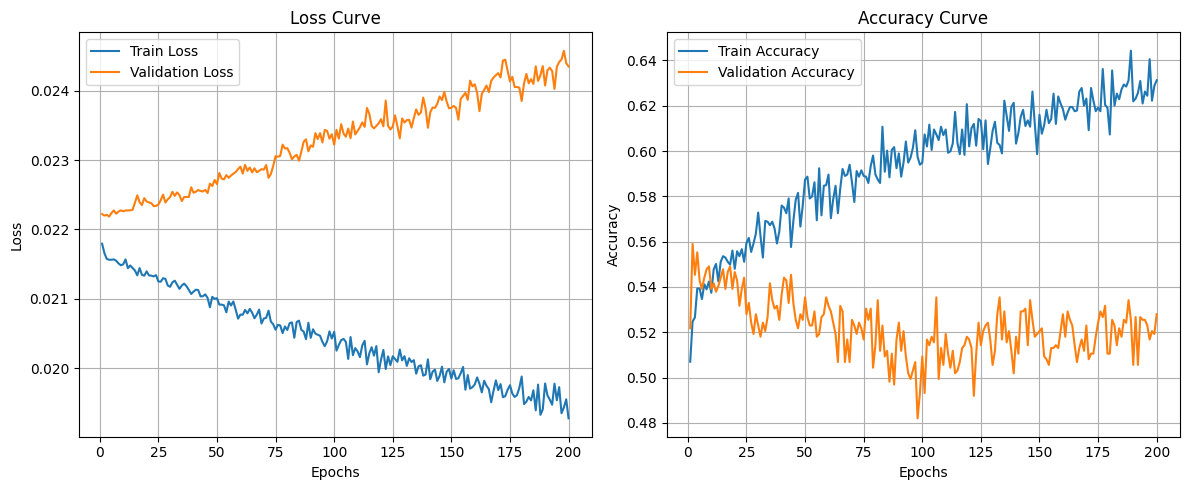

In [27]:
epochs_range = list(range(1, epochs + 1))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot Loss
axs[0].plot(epochs_range, train_losses, label="Train Loss")
axs[0].plot(epochs_range, val_losses, label="Validation Loss")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_title("Loss Curve")
axs[0].legend()
axs[0].grid(True)

# Plot Accuracy
axs[1].plot(epochs_range, train_accuracies, label="Train Accuracy")
axs[1].plot(epochs_range, val_accuracies, label="Validation Accuracy")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_title("Accuracy Curve")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()
